1. CARREGANDO E PREPARANDO OS DADOS

Carregando dataset PNS...

Dimensões do dataset: (20494, 42)

Primeiras 5 linhas:
   V0001  V0026  C008  C009  J001  M00203  N010  N012  N016  P02001  ...  \
0     21      1  54.0     2   3.0     1.0   1.0   1.0   1.0     0.0  ...   
1     21      1  41.0     3   3.0     1.0   1.0   1.0   2.0     0.0  ...   
2     21      1  62.0     0   2.0     1.0   1.0   1.0   1.0     0.0  ...   
3     21      1  51.0     2   2.0     1.0   1.0   2.0   1.0     0.0  ...   
4     21      1  42.0     0   2.0     1.0   2.0   2.0   2.0     0.0  ...   

   Instituicao_plano  Exposicao_quimica  Exposicao_ruido  Exposicao_lixo  \
0                0.0                  2                2               2   
1                0.0                  2                2               2   
2                1.0                  2                2               2   
3                0.0                  2                2               2   
4                0.0                  2     

Optimization Progress:   8%|▊         | 8/101 [00:20<03:59,  2.57s/it, best_trial=5, best_value=0.734]

[10:01:46] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
[10:01:46] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


[10:01:50] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.7445030900513426
[10:01:50] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed
[10:01:50] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
[10:02:07] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.7225490263425773
[10:02:07] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed
[10:02:07] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 107.80 secs


Optimization Progress:  24%|██▍       | 24/101 [01:48<05:48,  4.53s/it, best_trial=12, best_value=0.736]

[10:03:56] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[10:03:56] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[10:04:32] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.7487364807187048
[10:04:32] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[10:04:32] Time left 84.69 secs

[10:04:32] Layer 1 training completed.

[10:04:32] Blending: optimization starts with equal weights. Score = 0.7471055
[10:04:32] Blending: iteration 0: score = 0.7513047, weights = [0.2025096  0.23555769 0.         0.5619327 ]
[10:04:33] Blending: iteration 1: score = 0.7513472, weights = [0.2590113  0.15654913 0.         0.5844396 ]
[10:04:33] Blending: iteration 2: score = 0.7513543, weights = [0.25354606 0.16005072 0.         0.58640325]
[10:04:34] Blending: no improvements for score. Terminated.

[10:04:34] Blending: best score = 0.7513543, best weights = [0.25354606 0.16005072 0.         0.58640325]
[10:04:34] Automl preset training completed in 216.75 seconds

[10:04:34] Model description:
Final prediction for new objects (level 0) = 
	 0.25355 * (5 averaged models Lvl_0_Pipe_0_Mod

c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\LLAYS\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Acurácia no conjunto de teste: 0.9436

Matriz de Confusão:


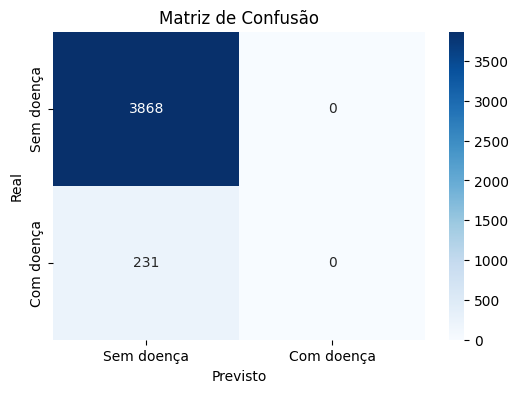


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3868
           1       0.00      0.00      0.00       231

    accuracy                           0.94      4099
   macro avg       0.47      0.50      0.49      4099
weighted avg       0.89      0.94      0.92      4099


6. IMPORTÂNCIA DAS VARIÁVEIS

Importância das features:
                     feature   importance
0                       J001  5658.205479
1                       P018  4598.112965
2                     P04502  3445.602962
3                      Renda  3100.737429
4                       H001  2851.171103
5                       H003  2762.651711
6                       N010  2669.308394
7          Tempo_parou_fumar  2360.186335
8                       H004  2325.390709
9                     N00101  2223.854722
10                      N016  2211.322219
11                    P02002  2034.596645
12     Carga_horaria_semanal  1913.895644

C:\Users\llays\AppData\Local\Temp\ipykernel_32160\3844516155.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature',


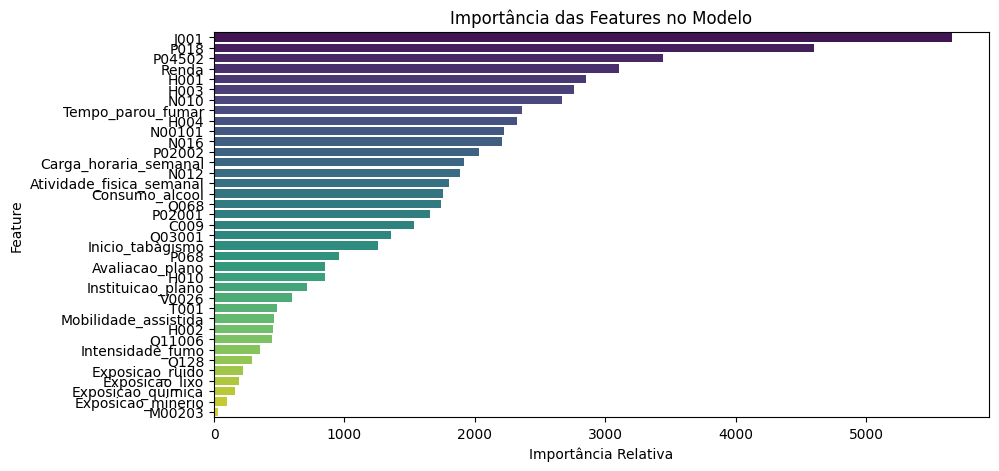

In [5]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

# Carregar dataset PNS
print("\nCarregando dataset PNS...")
data = pd.read_csv('../Bases/Criados/6.1_base_final.csv')

data = data.drop('C008', axis=1)
data = data.drop('Q00201', axis=1)
data = data.drop('V0001', axis=1)

print(f"\nDimensões do dataset: {data.shape}")
print("\nPrimeiras 5 linhas:")
print(data.head())

# Pré-processamento básico
print("\nRealizando pré-processamento...")

# Mapeando a variável-alvo para 0 e 1
data['Q06306'] = data['Q06306'].map({1: 1, 2: 0})  # 1 = tem doença do coração, 2 = não tem

# Remover linhas com target ausente
data = data.dropna(subset=['Q06306'])

# Selecionar apenas colunas numéricas e categóricas válidas (AutoML lida com isso)
print("\nDados após preparação mínima:")
print(f"- Total de registros: {len(data)}")
print(f"- Proporção de pessoas com doença do coração: {data['Q06306'].mean():.2%}")
print("\nEstatísticas descritivas:")
print(data.describe(include='all'))

# ==============================================
# 2. DIVISÃO DOS DADOS EM TREINO E TESTE
# ==============================================

print("\n" + "="*50)
print("2. DIVIDINDO OS DADOS EM TREINO E TESTE")
print("="*50)

# Dividir em features e target
X = data.drop('Q06306', axis=1)
y = data['Q06306']

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\nDimensões dos conjuntos:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"\nProporção de classes no treino: {y_train.mean():.2%}")
print(f"Proporção de classes no teste: {y_test.mean():.2%}")

# ==============================================
# 3. CONFIGURAÇÃO DO MODELO AUTOML
# ==============================================

print("\n" + "="*50)
print("3. CONFIGURANDO O LIGHTAUTOML")
print("="*50)

task = Task('binary')
print("\nTarefa definida: Classificação Binária")

timeout = 300
cpu_limit = 4
algorithms = ['lgb', 'lgb_tuned', 'cb', 'cb_tuned']

print("\nConfiguração do AutoML:")
print(f"- Tempo máximo: {timeout} segundos")
print(f"- CPUs utilizadas: {cpu_limit}")
print(f"- Algoritmos: {algorithms}")

automl = TabularAutoML(
    task=task,
    timeout=timeout,
    cpu_limit=cpu_limit,
    general_params={
        'use_algos': [algorithms],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 4. TREINAMENTO DO MODELO
# ==============================================

print("\n" + "="*50)
print("4. TREINANDO O MODELO")
print("="*50)

train_data = pd.concat([X_train, y_train], axis=1)

print("\nIniciando treinamento...")
oof_pred = automl.fit_predict(
    train_data, 
    roles={'target': 'Q06306'}, 
    verbose=1
)

print("\nTreinamento concluído!")

# ==============================================
# 5. AVALIAÇÃO DO MODELO
# ==============================================

print("\n" + "="*50)
print("5. AVALIANDO O MODELO")
print("="*50)

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

print("\nMatriz de Confusão:")
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 6. ANÁLISE DE IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("6. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        print("\nImportância das features:")
        print(feature_importances)
        
        plt.figure(figsize=(10,5))
        sns.barplot(x='importance', y='feature', 
                   data=feature_importances, 
                   palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.show()
        
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")
    
    try:
        if hasattr(automl.model, 'feature_importances_'):
            importances = automl.model.feature_importances_
            features = X_train.columns
            
            importance_df = pd.DataFrame({
                'feature': features,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(importance_df)
            
            plt.figure(figsize=(10,5))
            sns.barplot(x='importance', y='feature', 
                       data=importance_df, 
                       palette='viridis')
            plt.title('Importância das Features (Método Alternativo)')
            plt.xlabel('Importância Relativa')
            plt.ylabel('Feature')
            plt.show()
    except Exception as alt_e:
        print(f"\nTambém falhou ao tentar método alternativo: {str(alt_e)}")

1. CARREGANDO E PREPARANDO OS DADOS

Proporção original da classe positiva: 5.63%

2. BALANCEANDO OS DADOS

Novo tamanho da base balanceada: (2306, 39)
Distribuição balanceada:
Q06306
1    1153
0    1153
Name: count, dtype: int64

Proporção no treino: 50.00%
Proporção no teste: 50.00%

4. CONFIGURANDO LIGHTAUTOML

Iniciando treinamento com dados balanceados...
[13:23:11] Stdout logging level is INFO.
[13:23:11] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[13:23:11] Task: binary

[13:23:11] Start automl preset with listed constraints:
[13:23:11] - time: 300.00 seconds
[13:23:11] - CPU: 4 cores
[13:23:11] - memory: 16 GB

[13:23:11] Train data shape: (1844, 39)

[13:23:25] Layer 1 train process start. Time left 285.22 secs
[13:23:26] Selector_LightGBM fitting and predicting completed
[13:23:26] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
[13:23:29] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = 0.7494871095091779
[13:23:29] 

Optimization Progress:  84%|████████▍ | 85/101 [00:51<00:09,  1.67it/s, best_trial=25, best_value=0.781]

[13:24:21] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
[13:24:21] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


[13:24:23] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.7423266406613934
[13:24:23] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed
[13:24:23] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
[13:24:29] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.7402715496350949
[13:24:29] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed
[13:24:29] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 143.90 secs


Optimization Progress: 100%|██████████| 101/101 [01:39<00:00,  1.02it/s, best_trial=11, best_value=0.778]

[13:26:08] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[13:26:08] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[13:26:13] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.7584274024684619
[13:26:13] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[13:26:13] Time left 117.88 secs

[13:26:13] Layer 1 training completed.

[13:26:13] Blending: optimization starts with equal weights. Score = 0.7542596
[13:26:13] Blending: iteration 0: score = 0.7584274, weights = [0. 0. 0. 1.]
[13:26:13] Blending: iteration 1: score = 0.7586191, weights = [0.         0.08335511 0.         0.9166449 ]
[13:26:13] Blending: no improvements for score. Terminated.

[13:26:13] Blending: best score = 0.7586191, best weights = [0.         0.08335511 0.         0.9166449 ]
[13:26:13] Automl preset training completed in 182.56 seconds

[13:26:13] Model description:
Final prediction for new objects (level 0) = 
	 0.08336 * (5 averaged models Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM) +
	 0.91664 * (5 averaged models Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost) 

Treinamento concluído!

Acurácia: 0.6753


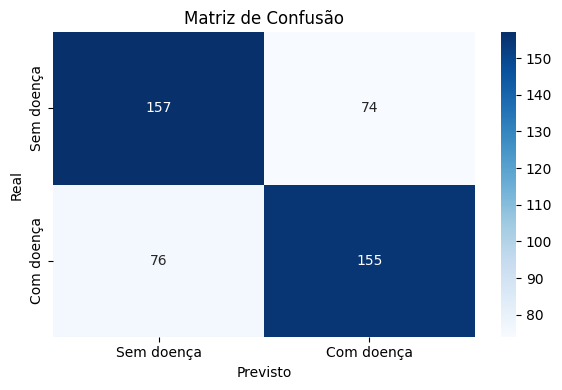


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       231
           1       0.68      0.67      0.67       231

    accuracy                           0.68       462
   macro avg       0.68      0.68      0.68       462
weighted avg       0.68      0.68      0.68       462


7. IMPORTÂNCIA DAS VARIÁVEIS
                 feature   importance
0                   J001  3988.839931
1                   H001  2676.058281
2                   N010  1600.434542
3                   Q068  1345.308288
4                   P018  1340.668267
5                  Renda  1241.757916
6  Carga_horaria_semanal  1127.438818
7                 Q03001  1083.660223
8      Tempo_parou_fumar   879.517320
9                   H004   871.562760


C:\Users\llays\AppData\Local\Temp\ipykernel_17200\1237333288.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


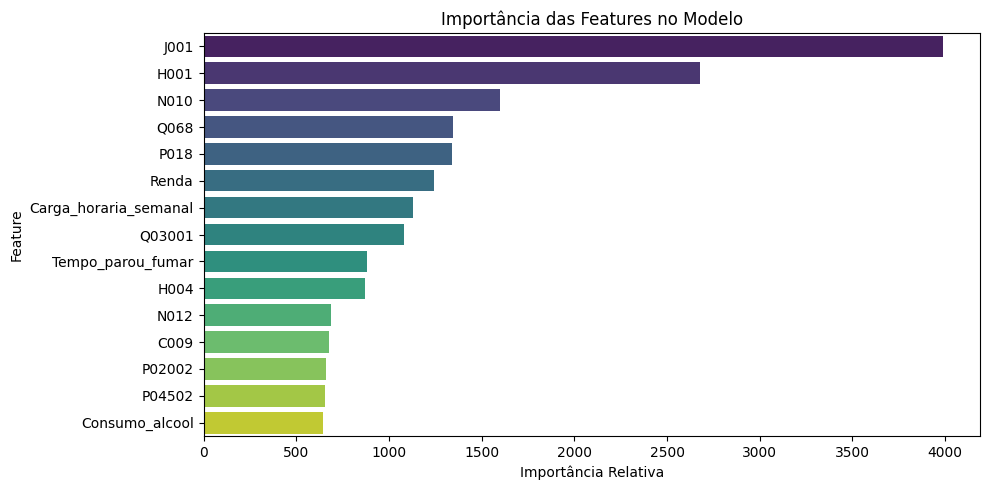

In [5]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

data = pd.read_csv('../Bases/Criados/6.1_base_final.csv')

# Remover colunas irrelevantes
data = data.drop(['C008', 'Q00201', 'V0001'], axis=1)

# Mapeia a variável-alvo
data['Q06306'] = data['Q06306'].map({1: 1, 2: 0})
data = data.dropna(subset=['Q06306'])

# Exibe proporção original
print(f"\nProporção original da classe positiva: {data['Q06306'].mean():.2%}")

# ==============================================
# 2. BALANCEAMENTO (undersampling simples)
# ==============================================

print("\n" + "="*50)
print("2. BALANCEANDO OS DADOS")
print("="*50)

classe_0 = data[data['Q06306'] == 0]
classe_1 = data[data['Q06306'] == 1]

min_tam = min(len(classe_0), len(classe_1))

classe_0_res = resample(classe_0, replace=False, n_samples=min_tam, random_state=42)
classe_1_res = resample(classe_1, replace=False, n_samples=min_tam, random_state=42)

data_bal = pd.concat([classe_0_res, classe_1_res]).sample(frac=1, random_state=42)

print(f"\nNovo tamanho da base balanceada: {data_bal.shape}")
print(f"Distribuição balanceada:\n{data_bal['Q06306'].value_counts()}")

# ==============================================
# 3. DIVISÃO DOS DADOS
# ==============================================

X = data_bal.drop('Q06306', axis=1)
y = data_bal['Q06306']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nProporção no treino: {y_train.mean():.2%}")
print(f"Proporção no teste: {y_test.mean():.2%}")

# ==============================================
# 4. AUTO ML CONFIG
# ==============================================

print("\n" + "="*50)
print("4. CONFIGURANDO LIGHTAUTOML")
print("="*50)

task = Task('binary')

automl = TabularAutoML(
    task=task,
    timeout=300,
    cpu_limit=4,
    general_params={
        'use_algos': [['lgb', 'lgb_tuned', 'cb', 'cb_tuned']],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 5. TREINAMENTO
# ==============================================

train_data = pd.concat([X_train, y_train], axis=1)
print("\nIniciando treinamento com dados balanceados...")
oof_pred = automl.fit_predict(train_data, roles={'target': 'Q06306'}, verbose=1)
print("Treinamento concluído!")

# ==============================================
# 6. AVALIAÇÃO
# ==============================================

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia: {accuracy:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 7. IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("7. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)

        print(feature_importances.head(10))

        plt.figure(figsize=(10, 5))
        sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")